# KING COUNTY HOUSING DATASET

In [1]:
#importing the necessary librarires

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

# EDA

In [3]:
#Load the dataset into a pandas dataframe
df = pd.read_csv('D:/DML PROJECT DATASET/HouseDataset/kc_house_data.csv')

In [4]:
#checking rows and column
df.shape

(21613, 21)

In [5]:
#listing the first 5 rows of dataset
df.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [6]:
#getting information of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
#summary statistics of the numerical columns in the DataFrame
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.161300e+04  2.161300e+04  21613.000000  21613.000000  21613.000000   
mean   4.580302e+09  5.400881e+05      3.370842      2.114757   2079.899736   
std    2.876566e+09  3.671272e+05      0.930062      0.770163    918.440897   
min    1.000102e+06  7.500000e+04      0.000000      0.000000    290.000000   
25%    2.123049e+09  3.219500e+05      3.000000      1.750000   1427.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    waterfront          view     condition  \
count  2.161300e+04  21613.000000  21613.000000  21613.000000  21613.000000   
mean   1.510697e+04      1.494309      0.007542      0.234303      3.409430   
std    4.142051e+04      0.539989      0.086517      0.766318      0.650743   
min    5.200000e+02      1.000000      0.000000      0.000000      1.000000   
25%    5.040000e+03      1.000000      0.000000      0.000000      3.000000   
50%    7.618000e+03      1.500000      0.000000      0.000000      3.000000   
75%    1.068800e+04      2.000000      0.000000      0.000000      4.000000   
max    1.651359e+06      3.500000      1.000000      4.000000      5.000000   

              grade    sqft_above  sqft_basement      yr_built  yr_renovated  \
count  21613.000000  21613.000000   21613.000000  21613.000000  21613.000000   
mean       7.656873   1788.390691     291.509045   1971.005136     84.402258   
std        1.175459    828.090978     442.575043     29.373411    401.679240   
min        1.000000    290.000000       0.000000   1900.000000      0.000000   
25%        7.000000   1190.000000       0.000000   1951.000000      0.000000   
50%        7.000000   1560.000000       0.000000   1975.000000      0.000000   
75%        8.000000   2210.000000     560.000000   1997.000000      0.000000   
max       13.000000   9410.000000    4820.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21613.000000  21613.000000  21613.000000   21613.000000   21613.000000  
mean   98077.939805     47.560053   -122.213896    1986.552492   12768.455652  
std       53.505026      0.138564      0.140828     685.391304   27304.179631  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471000   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.230000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [8]:
#checking the datatype of cloumn
qulitative_cols = []
quantitative_cols = []
for x in df.columns:
    if df[x].dtype =='object' or df[x].dtype=='bool':
        qulitative_cols.append(x)
    elif df[x].dtype =='int64' or df[x].dtype=='float64':
        quantitative_cols.append(x)
print(qulitative_cols)
print(quantitative_cols)

['date']
['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


# Data Preprocessing

In [9]:
#remove duplicate rows from pandas DataFrame df.
df.drop_duplicates(inplace=True)

In [10]:
#remove rows with missing or null values
df.dropna(inplace=True)

In [11]:
#dropping column that are not required
df.drop(columns=["id",'date','yr_renovated','zipcode','grade'], inplace=True)

In [12]:
bedroom_counts = df['bedrooms'].value_counts()
bedroom_counts

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

# more than 90% of the bedrooms are 2,3, or 4 bhk

In [13]:
#calculate the correlation coefficients between the columns
df.corr()

price  bedrooms  bathrooms  sqft_living  sqft_lot    floors  \
price          1.000000  0.308350   0.525138     0.702035  0.089661  0.256794   
bedrooms       0.308350  1.000000   0.515884     0.576671  0.031703  0.175429   
bathrooms      0.525138  0.515884   1.000000     0.754665  0.087740  0.500653   
sqft_living    0.702035  0.576671   0.754665     1.000000  0.172826  0.353949   
sqft_lot       0.089661  0.031703   0.087740     0.172826  1.000000 -0.005201   
floors         0.256794  0.175429   0.500653     0.353949 -0.005201  1.000000   
waterfront     0.266369 -0.006582   0.063744     0.103818  0.021604  0.023698   
view           0.397293  0.079532   0.187737     0.284611  0.074710  0.029444   
condition      0.036362  0.028472  -0.124982    -0.058753 -0.008958 -0.263768   
sqft_above     0.605567  0.477600   0.685342     0.876597  0.183512  0.523885   
sqft_basement  0.323816  0.303093   0.283770     0.435043  0.015286 -0.245705   
yr_built       0.054012  0.154178   0.506019     0.318049  0.053080  0.489319   
lat            0.307003 -0.008931   0.024573     0.052529 -0.085683  0.049614   
long           0.021626  0.129473   0.223042     0.240223  0.229521  0.125419   
sqft_living15  0.585379  0.391638   0.568634     0.756420  0.144608  0.279885   
sqft_lot15     0.082447  0.029244   0.087175     0.183286  0.718557 -0.011269   

               waterfront      view  condition  sqft_above  sqft_basement  \
price            0.266369  0.397293   0.036362    0.605567       0.323816   
bedrooms        -0.006582  0.079532   0.028472    0.477600       0.303093   
bathrooms        0.063744  0.187737  -0.124982    0.685342       0.283770   
sqft_living      0.103818  0.284611  -0.058753    0.876597       0.435043   
sqft_lot         0.021604  0.074710  -0.008958    0.183512       0.015286   
floors           0.023698  0.029444  -0.263768    0.523885      -0.245705   
waterfront       1.000000  0.401857   0.016653    0.072075       0.080588   
view             0.401857  1.000000   0.045990    0.167649       0.276947   
condition        0.016653  0.045990   1.000000   -0.158214       0.174105   
sqft_above       0.072075  0.167649  -0.158214    1.000000      -0.051943   
sqft_basement    0.080588  0.276947   0.174105   -0.051943       1.000000   
yr_built        -0.026161 -0.053440  -0.361417    0.423898      -0.133124   
lat             -0.014274  0.006157  -0.014941   -0.000816       0.110538   
long            -0.041910 -0.078400  -0.106500    0.343803      -0.144765   
sqft_living15    0.086463  0.280439  -0.092824    0.731870       0.200355   
sqft_lot15       0.030703  0.072575  -0.003406    0.194050       0.017276   

               yr_built       lat      long  sqft_living15  sqft_lot15  
price          0.054012  0.307003  0.021626       0.585379    0.082447  
bedrooms       0.154178 -0.008931  0.129473       0.391638    0.029244  
bathrooms      0.506019  0.024573  0.223042       0.568634    0.087175  
sqft_living    0.318049  0.052529  0.240223       0.756420    0.183286  
sqft_lot       0.053080 -0.085683  0.229521       0.144608    0.718557  
floors         0.489319  0.049614  0.125419       0.279885   -0.011269  
waterfront    -0.026161 -0.014274 -0.041910       0.086463    0.030703  
view          -0.053440  0.006157 -0.078400       0.280439    0.072575  
condition     -0.361417 -0.014941 -0.106500      -0.092824   -0.003406  
sqft_above     0.423898 -0.000816  0.343803       0.731870    0.194050  
sqft_basement -0.133124  0.110538 -0.144765       0.200355    0.017276  
yr_built       1.000000 -0.148122  0.409356       0.326229    0.070958  
lat           -0.148122  1.000000 -0.135512       0.048858   -0.086419  
long           0.409356 -0.135512  1.000000       0.334605    0.254451  
sqft_living15  0.326229  0.048858  0.334605       1.000000    0.183192  
sqft_lot15     0.070958 -0.086419  0.254451       0.183192    1.000000

# The project is of house price prediction so the target variable is Price

# Data Visualization

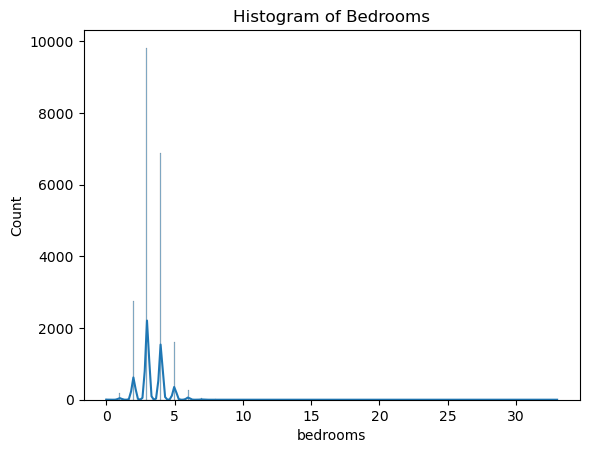

In [14]:
sns.histplot(data=df, x='bedrooms', kde=True)
plt.title('Histogram of Bedrooms')
plt.show()



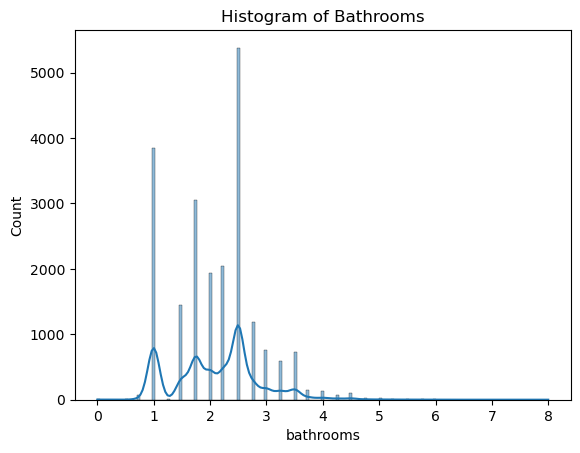

In [15]:
sns.histplot(data=df, x='bathrooms', kde=True)
plt.title('Histogram of Bathrooms')
plt.show()

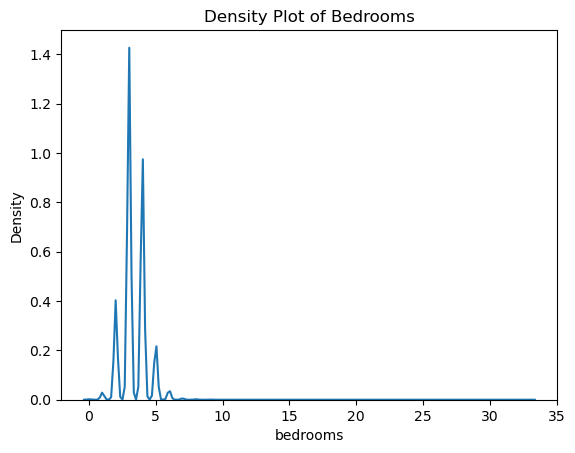

In [16]:
sns.kdeplot(data=df, x='bedrooms')
plt.title('Density Plot of Bedrooms')
plt.show()

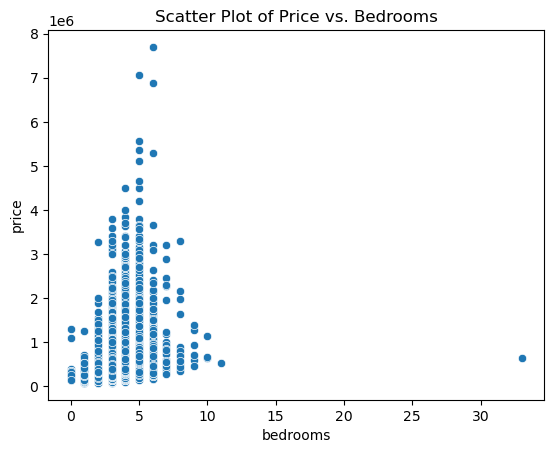

In [17]:
sns.scatterplot(data=df, x='bedrooms', y='price')
plt.title('Scatter Plot of Price vs. Bedrooms')
plt.show()



# most of the bedroom in the dataset are from 4 to 6 but the price differ i.e the number of bedroom does not show linearity with price

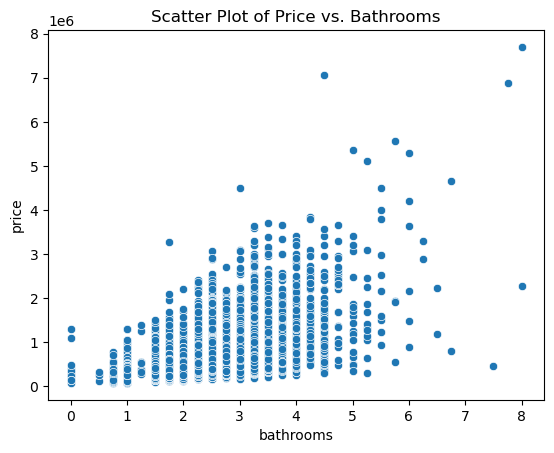

In [18]:
sns.scatterplot(data=df, x='bathrooms', y='price')
plt.title('Scatter Plot of Price vs. Bathrooms')
plt.show()



# most of the bathrooms in the dataset are from 2 to 5 and the price increase with the number of bathrooms.

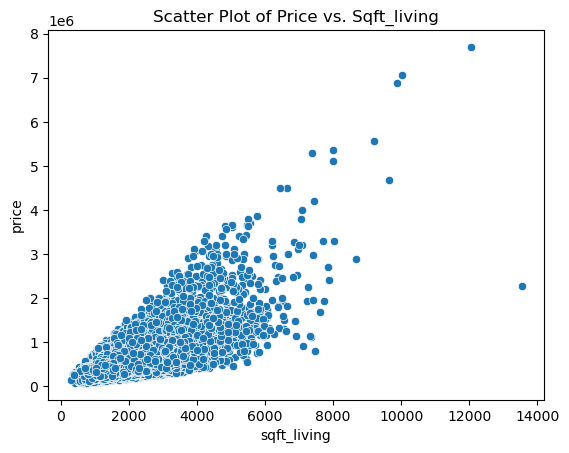

In [19]:
sns.scatterplot(data=df, x='sqft_living', y='price')
plt.title('Scatter Plot of Price vs. Sqft_living')
plt.show()

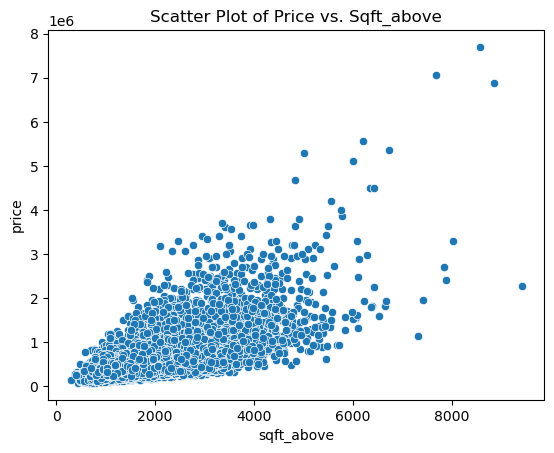

In [20]:
sns.scatterplot(data=df, x='sqft_above', y='price')
plt.title('Scatter Plot of Price vs. Sqft_above')
plt.show()

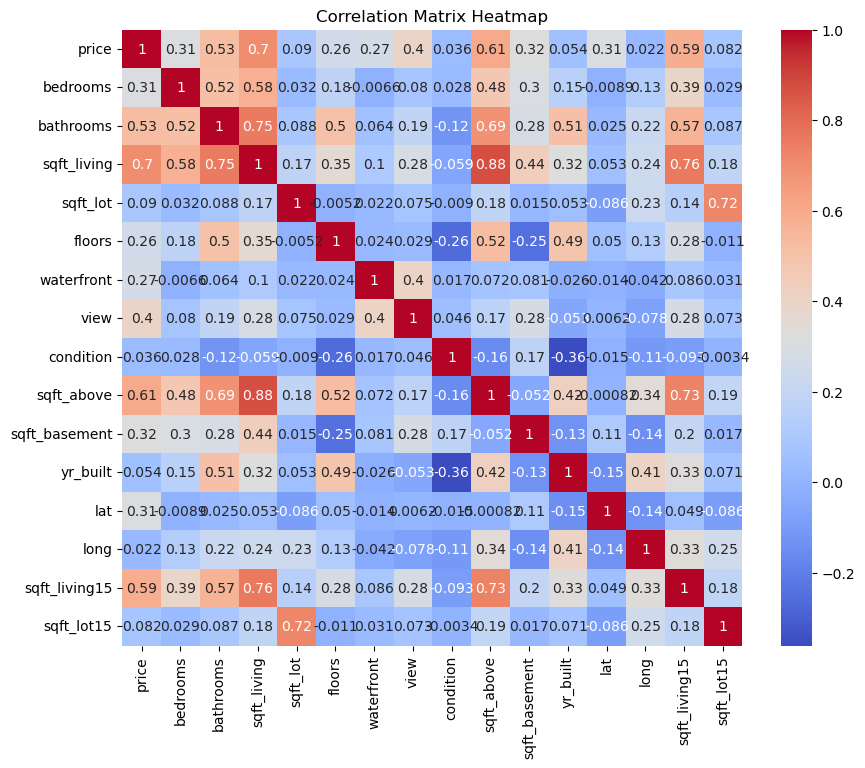

In [21]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(10, 8))
# Plotting the correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

# bathrooms, sqft_living, sqft_living15,sqft_above shows positive correlation between variables but first let try featuring and engineering with the age of the house as I have included in my proposal report.

# Features Selection and Engineering

In [22]:
# Compute the age of the house based on the year built
df['age'] = 2023 - df['yr_built']

# Select the features and target variable for the model
X = df[['age']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score:', r2)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)

R^2 score: 0.003621815776830406
Mean squared error: 150629178055.31534
Root mean squared error: 388109.75001320866


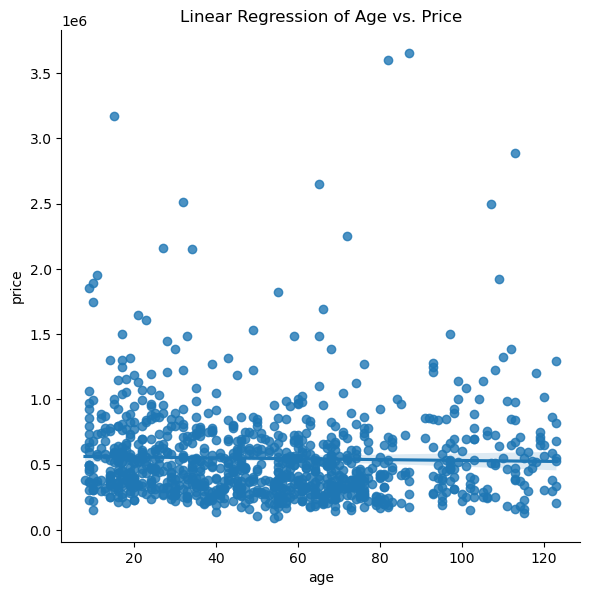

In [23]:
# Randomly sample 1000 data points
sampled_df = df.sample(n=1000, random_state=42)

# Plot a scatter plot of age vs. price with a linear regression line
sns.lmplot(data=sampled_df, x='age', y='price', height=6)
plt.title('Linear Regression of Age vs. Price')
plt.show()

# Computing the age of the house based on the year built does not have any impact.So trying we another features.

In [24]:
# Compute the living area to lot size ratio and price per square foot
df['living_lot_ratio'] = df['sqft_living'] / df['sqft_lot']
df['price_per_sqft'] = df['price'] / df['sqft_living']

In [25]:
# Select the features and target variable for the model
X = df[['living_lot_ratio', 'price_per_sqft']]
y = df['price']

In [26]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Selection

In [27]:
# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [28]:
# Make predictions on the testing set
y_pred = lr.predict(X_test)

In [29]:
# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [30]:
print('R^2 score for linear regression is :', r2)
print('Mean squared error for linear regression is :', mse)
print('Root mean squared error for linear regression is :', rmse)

R^2 score for linear regression is : 0.3181896684854927
Mean squared error for linear regression is : 103073844301.12067
Root mean squared error for linear regression is : 321051.15527143126


# Random Forest Regression Model

In [31]:
# Train a Random Forest regression model on the training set
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [32]:
# Make predictions on the testing set
y_pred = rf.predict(X_test)

In [33]:
# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [34]:
print('R^2 score for RandomForestRegressor :', r2)
print('Mean squared error for RandomForestRegressor :', mse)
print('Root mean squared error for RandomForestRegressor :', rmse)

R^2 score for RandomForestRegressor : 0.33047844556756456
Mean squared error for RandomForestRegressor : 101216067384.19563
Root mean squared error for RandomForestRegressor : 318144.72710418387


# Lasso Regression Model

In [35]:
# Train a Lasso regression model on the training set
lasso = Lasso(alpha=0.5)
lasso.fit(X_train, y_train)

Lasso(alpha=0.5)

In [36]:
# Make predictions on the testing set
y_pred = lasso.predict(X_test)

In [37]:
# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [38]:
#print the score

print('R^2 score for lasso regression model :', r2)
print('Mean squared error for lasso regression model :', mse)
print('Root mean squared error for lasso regression model :', rmse)

R^2 score for lasso regression model : 0.3181897249050504
Mean squared error for lasso regression model : 103073835771.79742
Root mean squared error for lasso regression model : 321051.14198799763


# I got really low score for above feature.So, trying with another features.

In [39]:
# selecting price_per_sqft column for price prediction
X = df['price_per_sqft'].values.reshape(-1,1)
y = df['price'].values

In [40]:
# create a linear regression model
model = LinearRegression()

In [41]:
# fit the model on the data
model.fit(X, y)

LinearRegression()

In [42]:
# predict the target variable
y_pred = model.predict(X)

In [43]:
# print the model coefficients
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Coefficients: [1850.30882803]
Intercept: 51316.8644721483


In [44]:
# calculate the mean squared error and R-squared score
mse = np.mean((y - y_pred)**2)
r_score = model.score(X, y)

In [45]:
print('Mean Squared Error:', mse)
print('R-squared Score:', r_score)

Mean Squared Error: 93306181782.51978
R-squared Score: 0.30769511397384564


# This too does not work well.
# let's Compute with all sqft column

In [46]:

X = df[['sqft_living', 'sqft_above', 'sqft_living15']]
# Select the features and target variable for the model
#X = df[['sqft']]
y = df['price']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = lr.predict(X_test)

# Evaluate the model performance on the testing set
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print('R^2 score:', r2)
print('Mean squared error:', mse)
print('Root mean squared error:', rmse)

R^2 score: 0.5031867996453844
Mean squared error: 75106586235.41777
Root mean squared error: 274055.8086146283


# The result improved a bit.
# Trying to include most of the column that might have an impact on result.

In [47]:
# creating tuples and including relevant column
feature = ["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","sqft_living"]

In [48]:
Y = df['price']
lr = LinearRegression()
lr.fit(df[feature], Y)


print("The R^2 value is : " + str(lr.score(df[feature], Y)))

The R^2 value is : 0.6360509574663117


# using scikit-learns Pipeline module to create a pipeline of transformations and estimators for our data.
# Linear Regression

In [49]:
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', LinearRegression())]

In [50]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], Y)


Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [51]:
# Make predictions on the data
predictions = pipe.predict(df[feature])

In [52]:
# Calculate the MSE and RMSE
mse = mean_squared_error(Y, predictions)
r2 = r2_score(Y, predictions)

In [53]:
print("The MSE value for Linear Regressor is : " + str(mse))
print("The R^2 score value for Linear Regressor is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Linear Regressor is : " + str(rmse))

The MSE value for Linear Regressor is : 37987615116.62789
The R^2 score value for Linear Regressor is : 0.7181428813042544
The Root mean score value for Linear Regressor is : 194904.11775185226


# Random Forest Regressor

In [54]:
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', RandomForestRegressor())]

In [55]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], Y)
# Make predictions on the data
predictions = pipe.predict(df[feature])

In [56]:
# Calculate the MSE and RMSE
mse = mean_squared_error(Y, predictions)
r2 = r2_score(Y, predictions)

In [57]:
print("The MSE value for Random Forest Regressor is : " + str(mse))
print("The R^2 score value for Random Forest Regressor is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Random Forest Regressor is : " + str(rmse))

The MSE value for Random Forest Regressor is : 4045101029.0332785
The R^2 score value for Random Forest Regressor is : 0.9699865201493669
The Root mean score value for Random Forest Regressor is : 63601.108709151275


# Support vector machine

In [58]:
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', SVR())]

In [59]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], Y)
# Make predictions on the data
predictions = pipe.predict(df[feature])

In [60]:
# Calculate the MSE and RMSE
mse = mean_squared_error(Y, predictions)
r2 = r2_score(Y, predictions)

In [61]:
print("The MSE value for SVR is : " + str(mse))
print("The R^2 score value for SVR is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for SVR is : " + str(rmse))

The MSE value for SVR is : 142669978427.17154
The R^2 score value for SVR is : -0.05856998183244633
The Root mean score value for SVR is : 377716.79659127095


# Decisioin Tree Regression

In [62]:
from sklearn.tree import DecisionTreeRegressor 

In [63]:
estimators = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model', DecisionTreeRegressor())]

In [64]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], Y)
# Make predictions on the data
predictions = pipe.predict(df[feature])

In [65]:
# Calculate the MSE and RMSE
mse = mean_squared_error(Y, predictions)
r2 = r2_score(Y, predictions)

In [66]:
print("The MSE value for Decision Tree Regression is : " + str(mse))
print("The R^2 score value for Decision Tree regression is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Decision Tree regression is : " + str(rmse))

The MSE value for Decision Tree Regression is : 118460927.86128719
The R^2 score value for Decision Tree regression is : 0.9991210541724587
The Root mean score value for Decision Tree regression is : 10883.975737812318


# Lasso Regression

In [67]:
estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('model', Lasso(alpha=0.5))] 
# Set the Lasso regularization parameter alpha

In [68]:
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], Y)
# Make predictions on the data
predictions = pipe.predict(df[feature])

C:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.438e+14, tolerance: 2.913e+11
  model = cd_fast.enet_coordinate_descent(


In [69]:
# Calculate the MSE and RMSE
mse = mean_squared_error(Y, predictions)
r2 = r2_score(Y, predictions)

In [70]:
print("The MSE value for Lasso Regression is : " + str(mse))
print("The R^2 score value for Lasso Regression is : " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Lasso Regression is : " + str(rmse))

The MSE value for Lasso Regression is : 37988379688.162735
The R^2 score value for Lasso Regression is : 0.718137208404569
The Root mean score value for Lasso Regression is : 194906.07914624608


# Implementing PCA with pipeline module
# Random Forest with PCA

In [71]:
from sklearn.decomposition import PCA
estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', RandomForestRegressor())]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for random forest Regression with PCA is: " + str(mse))
print("The R^2 score value for random forest Regression with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for random forest Regression with PCA is: " + str(rmse))

The MSE value for random forest Regression with PCA is: 8960625611.884249
The R^2 score value for random forest Regression with PCA is: 0.9335147492433268
The Root mean score value for random forest Regression with PCA is: 94660.58108782266


# lasso with PCA

In [72]:
estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', Lasso(alpha=0.5))]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for Lasso Regression with PCA is: " + str(mse))
print("The R^2 score value for Lasso Regression with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Lasso Regression with PCA is: " + str(rmse))

The MSE value for Lasso Regression with PCA is: 118254708806.80614
The R^2 score value for Lasso Regression with PCA is: 0.12258425820732255
The Root mean score value for Lasso Regression with PCA is: 343881.8238971146


# Decision Tree with PCA

In [73]:
estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', DecisionTreeRegressor())]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for Decision Tree Regression with PCA is: " + str(mse))
print("The R^2 score value for Decision Tree Regression with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Decision Tree Regression with PCA is: " + str(rmse))

The MSE value for Decision Tree Regression with PCA is: 118460927.86128719
The R^2 score value for Decision Tree Regression with PCA is: 0.9991210541724587
The Root mean score value for Decision Tree Regression with PCA is: 10883.975737812318


# SVR with PCA

In [74]:
estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', SVR())]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for SVR with PCA is: " + str(mse))
print("The R^2 score value for SVR with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for SVR with PCA is: " + str(rmse))

The MSE value for SVR with PCA is: 142840699683.031
The R^2 score value for SVR with PCA is: -0.05983668418080201
The Root mean score value for SVR with PCA is: 377942.7201085252


# Linear Regression with PCA

In [75]:
estimators = [('scale', StandardScaler()),
              ('polynomial', PolynomialFeatures(include_bias=False)),
              ('reduce_dim', PCA(n_components=2)),
              ('model', LinearRegression())]
              
pipe = Pipeline(estimators)

# Fit the pipeline to the data
pipe.fit(df[feature], y)

# Make predictions on the data
predictions = pipe.predict(df[feature])

# Calculate the MSE and RMSE
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)

print("The MSE value for Linear Regression with PCA is: " + str(mse))
print("The R^2 score value for Linear Regression with PCA is: " + str(r2))
rmse = mse ** 0.5
print("The Root mean score value for Linear Regression with PCA is: " + str(rmse))

The MSE value for Linear Regression with PCA is: 118254708806.80817
The R^2 score value for Linear Regression with PCA is: 0.12258425820730745
The Root mean score value for Linear Regression with PCA is: 343881.8238971176


In [76]:
df[feature]

floors  waterfront      lat  bedrooms  sqft_basement  view  bathrooms  \
0         1.0           0  47.5112         3              0     0       1.00   
1         2.0           0  47.7210         3            400     0       2.25   
2         1.0           0  47.7379         2              0     0       1.00   
3         1.0           0  47.5208         4            910     0       3.00   
4         1.0           0  47.6168         3              0     0       2.00   
...       ...         ...      ...       ...            ...   ...        ...   
21608     3.0           0  47.6993         3              0     0       2.50   
21609     2.0           0  47.5107         4              0     0       2.50   
21610     2.0           0  47.5944         2              0     0       0.75   
21611     2.0           0  47.5345         3              0     0       2.50   
21612     2.0           0  47.5941         2              0     0       0.75   

       sqft_living15  sqft_above  sqft_living  
0               1340        1180         1180  
1               1690        2170         2570  
2               2720         770          770  
3               1360        1050         1960  
4               1800        1680         1680  
...              ...         ...          ...  
21608           1530        1530         1530  
21609           1830        2310         2310  
21610           1020        1020         1020  
21611           1410        1600         1600  
21612           1020        1020         1020  

[21613 rows x 10 columns]

In [77]:
# importing statsmodel
import statsmodels.api as sm

In [78]:
# Add constant to the feature matrix
X = sm.add_constant(df[feature])

# Fit the OLS model to the data
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.636
Method:                 Least Squares   F-statistic:                     4195.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        15:41:32   Log-Likelihood:            -2.9668e+05
No. Observations:               21613   AIC:                         5.934e+05
Df Residuals:                   21603   BIC:                         5.935e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.447e+07   5.25e+05    -65.702